In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##### I use the Canada Youtube trending data from Kaggle

In [2]:
df = pd.read_csv('./input/CAvideos.csv')
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [3]:
df.shape

(40881, 16)

In [10]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'publish_date',
       'time_of_publish', 'publish_hour'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [5]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [6]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### What is the best time to publish  videos on YouTube to get more views?

In [4]:
df['publish_date'] = df['publish_time'].apply(lambda x : str(x).split('T')[0])
# df['time_of_publish'] = df['publish_time'].apply(lambda x : x.split('T')[1])
df['publish_date'] = pd.to_datetime(df['publish_date'] )

In [5]:
df['time_of_publish'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['time_of_publish'].dt.hour
df['publish_hour'].value_counts().head(3)

16    3989
17    3208
15    2679
Name: publish_hour, dtype: int64

In [8]:
df.groupby('publish_hour')['views'].mean().sort_values(ascending  = False).astype('int')

publish_hour
5     2563636
9     2518229
4     2158561
8     1689870
7     1672217
13    1608767
6     1488243
12    1471429
14    1259075
11    1163467
3     1146501
15    1091099
1     1073116
17    1049136
18    1027851
0      982329
10     975775
21     966298
22     949538
20     923697
2      893601
19     832258
16     765200
23     752726
Name: views, dtype: int32

In [9]:
df.groupby('publish_hour')['likes'].mean().sort_values(ascending  = False).astype('int')

publish_hour
9     124519
5      88170
4      76158
13     48023
12     45743
8      44679
15     43744
18     41839
14     39940
17     39665
22     37367
0      36876
21     35866
19     34233
7      33730
20     31503
6      30670
3      30408
1      30390
11     30071
16     29804
23     27415
10     24262
2      23261
Name: likes, dtype: int32

In [11]:
df.groupby('publish_hour')['comment_count'].mean().sort_values(ascending  = False).astype('int')

publish_hour
9     19454
4      7295
5      7141
18     6674
0      6158
13     5986
17     5965
19     5519
22     5155
15     5041
12     4880
1      4780
21     4767
20     4429
23     4371
8      4000
2      3891
3      3873
14     3635
11     3440
16     3206
7      3129
6      2893
10     2665
Name: comment_count, dtype: int32

- The best time to publish videos for gathering more views, likes and comments is around 4 pm, 5 pm and 9 pm

## Channel Title

### Which channel got the highest average view? What are the top ten channel regarding views and likes?

In [7]:
df['channel_title'].nunique()

5076

In [60]:
max_viewed = df.groupby('channel_title')['views'].mean().sort_values(ascending = False).to_frame().astype('int').head(10)
max_viewed

,views
channel_title,
ChildishGambinoVEVO,51471883
YouTube Spotlight,48921289
Kylie Jenner,40375448
DrakeVEVO,31697292
FoxStarHindi,27164263
ibighit,26924627
ArianaGrandeVevo,26802485
Marvel Entertainment,25933851
Bruno Mars,24985119


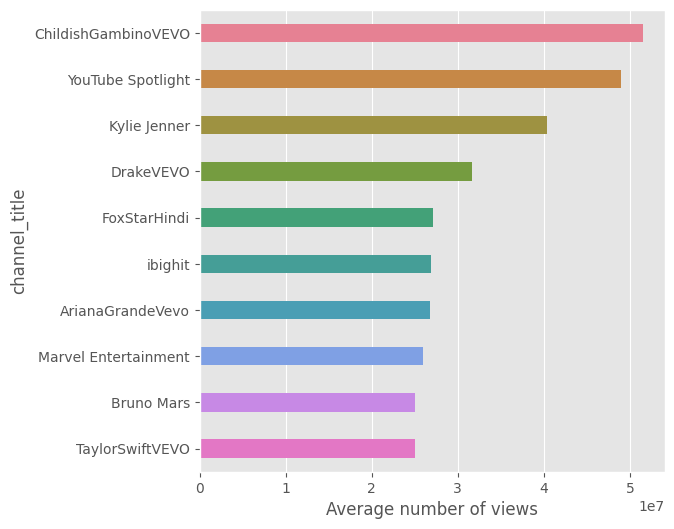

In [61]:
plt.figure(figsize=(6,6))
sns.barplot(y=max_viewed.index,x=max_viewed.views,data=max_viewed,width = 0.4, palette='husl')
plt.xlabel("Average number of views")

plt.show()

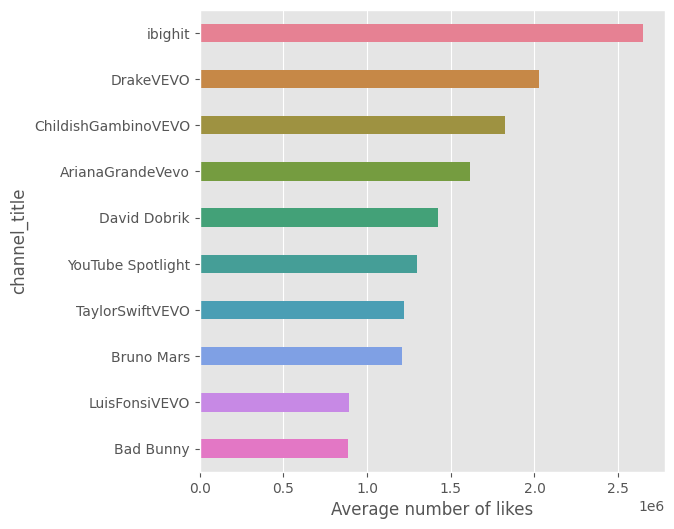

In [57]:
max_liked = df.groupby(["channel_title"])["likes"].mean().sort_values(ascending=False).to_frame().head(10)

plt.figure(figsize=(6,6))
sns.barplot(y=max_liked.index,x=max_liked.likes,data=max_liked,width = 0.4, palette='husl')
plt.xlabel("Average number of likes")

plt.show()

## Which video is the most viewed video of all?

In [56]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'publish_date',
       'time_of_publish'],
      dtype='object')

In [12]:
max_views = df['views'].max()

In [13]:
df[df['views'] == max_views][['title', 'channel_title', 'views']]

,title,channel_title,views
5900,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,137843120


In [62]:
df.sort_values(by = 'views', ascending = False)[['title', 'channel_title', 'views','category_id']].head(5)

,title,channel_title,views,category_id
5900,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,137843120,24
5623,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,125431369,24
5398,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,24
5197,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567,24
34361,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,98938809,10


## Which video is the most liked video of all?

In [17]:
df['likes_per_view'] = round(100 * df['likes']/df['views'], 3)

In [18]:
df[df['likes'] == df['likes'].max()][['title', 'channel_title', 'views', 'likes', 'likes_per_view']]

,title,channel_title,views,likes,likes_per_view
36453,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,80738011,5053338,6.259


In [19]:
max_liked = df['likes_per_view'].max()

In [20]:
df[df['likes_per_view'] == max_liked][['title', 'channel_title', 'views', 'likes', 'likes_per_view']]

,title,channel_title,views,likes,likes_per_view
16999,BlocBoy JB & Drake Look Alive Prod By: Tay Kei...,BlocBoy JB,38441,17318,45.051


In [63]:
df.sort_values(by = 'likes_per_view', ascending = False)[['title', 'channel_title', 'views', 'likes', 'likes_per_view']].head(5)

,title,channel_title,views,likes,likes_per_view
16999,BlocBoy JB & Drake Look Alive Prod By: Tay Kei...,BlocBoy JB,38441,17318,45.051
6309,PADMAN Official Trailer | Akshay Kumar | Sonam...,Sony Pictures India,178709,71984,40.280
4508,The Reaction of The Streets (I Wait-Day6 Edition),JaeSix,88889,25599,28.799
10200,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,567412,159390,28.091
17918,Un Film Pour Raphael,Émile Roy,6463,1724,26.675


### Which video have the most online discussion?

In [64]:
df['comments_per_view']= df['comment_count']/df['views']
df.sort_values(by = 'comments_per_view', ascending = False)[['title', 'channel_title', 'views','likes', 'comment_count', 'comments_per_view']].head(5)

,title,channel_title,views,likes,comment_count,comments_per_view
10949,GUCCI MADE ME PINK CUSTOM LUGGAGE! + HANDBAG G...,jeffreestar,811601,108516,247214,0.304600
9653,Why I'm Deleting SkyDoesMinecraft (Midnight HST),Sky Did Minecraft,193053,21294,58011,0.300493
15804,"FULL FACE FIRST IMPRESSIONS | TRYING $1,000 OF...",jeffreestar,888946,92003,192976,0.217084
16043,"FULL FACE FIRST IMPRESSIONS | TRYING $1,000 OF...",jeffreestar,1457429,125571,262658,0.180220
2323,My $2500 iPhone X Setup! + NEW iPhone X Giveaway,EverythingApplePro,199971,21607,35316,0.176606


In [65]:
df['views_per_comment']= df['views']/ df['comment_count']
df.sort_values(by = 'views_per_comment')[['title', 'channel_title', 'views','likes', 
                                          'comment_count', 'comments_per_view','views_per_comment']].head(5)

,title,channel_title,views,likes,comment_count,comments_per_view,views_per_comment
10949,GUCCI MADE ME PINK CUSTOM LUGGAGE! + HANDBAG G...,jeffreestar,811601,108516,247214,0.304600,3.282990
9653,Why I'm Deleting SkyDoesMinecraft (Midnight HST),Sky Did Minecraft,193053,21294,58011,0.300493,3.327869
15804,"FULL FACE FIRST IMPRESSIONS | TRYING $1,000 OF...",jeffreestar,888946,92003,192976,0.217084,4.606511
16043,"FULL FACE FIRST IMPRESSIONS | TRYING $1,000 OF...",jeffreestar,1457429,125571,262658,0.180220,5.548771
2323,My $2500 iPhone X Setup! + NEW iPhone X Giveaway,EverythingApplePro,199971,21607,35316,0.176606,5.662334


### Correlation

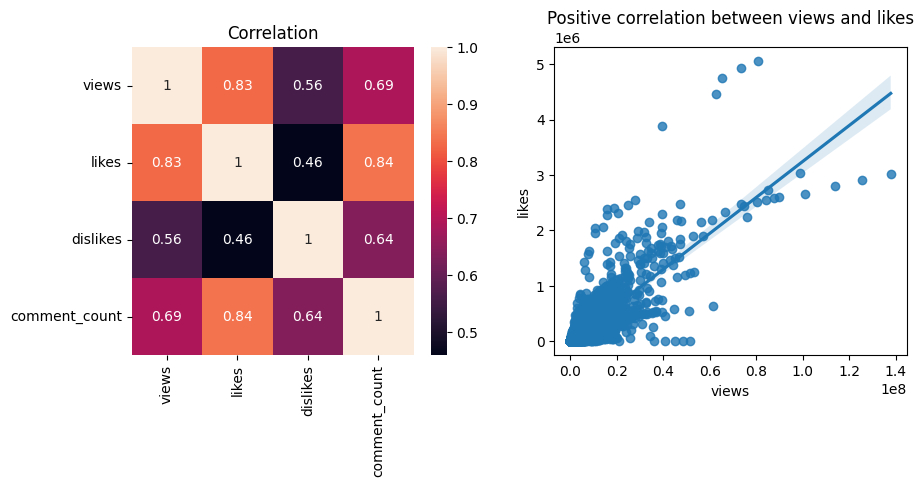

In [39]:
corr_columns = ['views', 'likes', 'dislikes', 'comment_count']
correlation = df[corr_columns].corr().round(2)


fig = plt.figure(figsize= (10,4))

ax1 = fig.add_subplot(121)
sns.heatmap(correlation, annot=True)
plt.title('Correlation')


ax2 = fig.add_subplot(122)
sns.regplot(data = df, x= 'views', y = 'likes')
plt.title('Positive correlation between views and likes')
plt.show()

### Which Category has the most views?

In [67]:
df.groupby('category_id')['views'].mean().sort_values(ascending = False).astype('int')

category_id
10    3532524
30    2853415
29    1562184
1     1426728
28    1233844
17    1075583
24    1016371
23     982888
20     923759
22     786413
26     782683
15     638461
43     577012
2      566759
27     536602
25     388220
19     366701
Name: views, dtype: int32

### Time required to become trending

#### Which channel gets its videos trending quickly

In [26]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format = '%y.%d.%m')

In [79]:
df['trending_time'] = df['trending_date']  - df['publish_date']
df['trending_time'] = df.trending_time.apply(lambda x : pd.to_numeric(str(x).split()[0]))

In [83]:
df.groupby('channel_title')['trending_time'].mean().sort_values().reset_index(name = 'days').head(10)

,channel_title,days
0,HUGO CAICEDO,0.0
1,CaldwellBPanda,0.0
2,I AM WILDCAT,0.0
3,Pipocando,0.0
4,Raptors Republic,0.0
5,Sam,0.0
6,DOVE TELEVISION,0.0
7,Lanki Thuy,0.0
8,Nomadic Fanatic,0.0
9,IG - Daily,0.0


In [86]:
# Which channels took more time to be trending

df.groupby('channel_title')['trending_time'].mean().sort_values(ascending = False).reset_index(name = 'days').head(10)

,channel_title,days
0,nenuostabu,3657.5
1,lbisurfer,3584.0
2,KatieWear,3196.0
3,westsidewillz,2894.0
4,Josh McConnell,1853.0
5,launchpadgames,1706.0
6,bethyalamode,1696.5
7,Bill Omar,1653.0
8,CranberriesVEVO,1630.5
9,SpikeySpotify,1498.0
